In [38]:
import numpy as np
import pandas as pd
from Freezer import getMyPosition as getPosition
import seaborn as sns
import matplotlib.pyplot as plt

nInst = 0
nt = 0

# Commission rate
commRate = 0.0025 # was 0.0050

# Dollar position limit (maximum absolute dollar value of any individual stock position)
dlrPosLimit = 10000

timeOut=600 

pricesFile="./prc500.txt"
prcAll = df=pd.read_csv(pricesFile, sep='\s+', header=None, index_col=None)

In [39]:
y_s = [i for i in range(250)]
prcNormalized = pd.DataFrame()
for i in range(100):
    prcNormalized[i] = prcAll[i]
prcNormalized


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,40.44,4.90,30.92,18.51,47.69,61.70,54.07,18.65,44.13,49.39,...,52.30,38.38,54.80,28.49,31.98,63.15,51.62,11.12,33.32,41.10
1,40.58,4.88,30.95,18.41,47.55,61.38,54.10,18.71,43.97,49.29,...,52.48,38.37,54.78,28.40,32.18,63.15,51.69,11.15,33.35,41.35
2,40.52,4.90,31.02,18.37,47.70,62.10,54.15,18.63,44.13,49.61,...,52.08,38.40,54.82,28.33,32.04,63.16,51.68,11.16,33.31,41.82
3,40.47,4.92,30.98,18.42,47.66,62.70,54.16,18.51,44.22,49.53,...,52.13,38.41,54.83,28.28,31.70,63.19,51.74,11.14,33.70,41.86
4,40.23,4.91,30.93,18.39,48.09,63.06,54.20,18.62,44.55,49.57,...,52.76,38.39,54.80,28.48,31.59,63.19,51.81,11.14,33.76,41.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,39.45,3.00,27.18,16.29,44.49,54.18,51.77,12.79,38.21,48.99,...,64.44,36.64,51.78,26.47,26.26,60.66,49.36,8.11,32.02,41.43
496,39.45,3.00,27.20,16.27,44.32,53.69,51.83,12.79,38.28,49.08,...,63.40,36.67,51.81,26.62,26.22,60.67,49.33,8.12,32.05,41.56
497,39.24,3.02,27.18,16.16,44.18,53.69,51.86,12.84,38.22,49.10,...,62.80,36.69,51.81,26.67,26.02,60.68,49.39,8.08,32.06,42.18
498,39.14,3.01,27.17,16.19,44.07,53.63,51.82,12.75,38.15,48.92,...,61.82,36.69,51.77,26.45,26.06,60.68,49.38,8.06,32.14,42.26


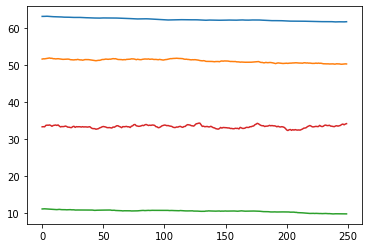

In [4]:
for i in range(95,99):
    x_s = prcNormalized[i]
    plt.plot(y_s, x_s)

In [5]:
corr = pd.DataFrame()
minCorr = 1
minPair = (0,0)
for i in range(100):
    newCorr = []
    for j in range(100):
        curCorr = prcNormalized[i].corr(prcNormalized[j])
        if abs(curCorr) < minCorr:
            minCorr = abs(curCorr)
            minPair = (i,j)
        newCorr.append(curCorr)
corr = prcNormalized.corr()
minPair

(19, 82)

In [6]:
VAT = []
mapping = {}
start = 0
I, J = set(), set()
for i in range(100):
    J.add(i)
J.remove(start)
I.add(start)
VAT.append(start)
mapping[0] = start
for i in range(1,100):
    maxCorr = 0
    maxPoint = 0
    for p1 in I:
        for p2 in J:
            if abs(corr[p1][p2]) > maxCorr:
                maxCorr = abs(corr[p1][p2])
                maxPoint = p2
    J.remove(maxPoint)
    I.add(maxPoint)
    VAT.append(maxPoint)
    mapping[i] = maxPoint
clusteredCorr = pd.DataFrame()
for i in range(100):
    newCorr = []
    for j in range(100):
        newCorr.append(abs(corr[VAT[i]][VAT[j]]))
    clusteredCorr[i] = pd.Series(newCorr)




<AxesSubplot:>

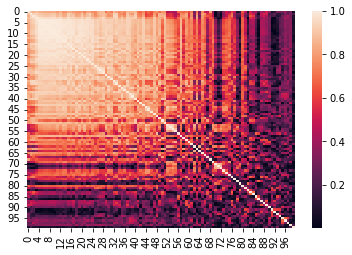

In [7]:
sns.heatmap(clusteredCorr)


<AxesSubplot:>

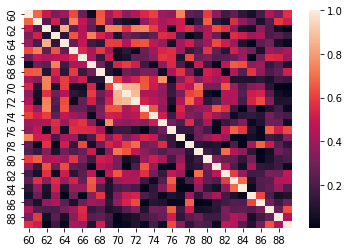

In [8]:
sns.heatmap(clusteredCorr.iloc[60:90,60:90])

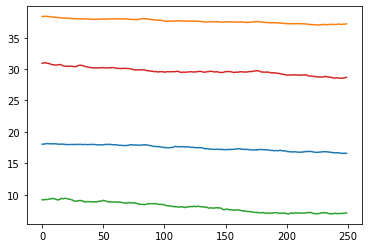

In [9]:
for i in range(15,19):
    x_s = prcNormalized[mapping[i]]
    plt.plot(y_s, x_s)

In [10]:
threshold = 0.5
clusters = []
curPoint = 0
J = set()
for i in range(100):
    J.add(i)
curCluster = set()
while len(J) > 0:
    maxCorr = 0
    maxPoint = 0
    for p1 in curCluster:
        for p2 in J:
            if abs(corr[p1][p2]) > maxCorr:
                maxCorr = abs(corr[p1][p2])
                maxPoint = p2
    J.remove(maxPoint)
    newClust= False
    for p1 in curCluster:
        if abs(corr[p1][maxPoint]) < threshold:
            clusters.append(curCluster)
            curCluster = set()
            curCluster.add(maxPoint)
            newClust= True
            break
    if not newClust:
        curCluster.add(maxPoint)
clusters.append(curCluster)
clusters

[{0,
  1,
  2,
  6,
  8,
  10,
  11,
  12,
  14,
  15,
  18,
  21,
  22,
  26,
  28,
  29,
  31,
  32,
  33,
  34,
  36,
  39,
  40,
  42,
  44,
  47,
  49,
  51,
  52,
  54,
  57,
  60,
  67,
  68,
  70,
  71,
  73,
  74,
  76,
  78,
  80,
  86,
  87,
  89,
  91,
  92,
  95,
  96,
  97},
 {3, 5, 46, 62, 65, 93},
 {41, 72, 84},
 {50, 55, 69},
 {13, 25, 48},
 {38, 63},
 {16, 17, 58, 99},
 {7, 23, 59, 66, 90, 94},
 {53, 77},
 {27, 79, 81},
 {64, 75},
 {4},
 {35, 45, 61},
 {37, 82},
 {24, 30},
 {85},
 {43},
 {20, 83},
 {56},
 {19},
 {88},
 {98},
 {9}]

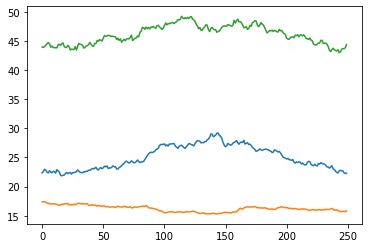

In [11]:
for i in clusters[3]:
    x_s = prcNormalized[i]
    plt.plot(y_s, x_s)

In [12]:
for i in range(100):
    curSeries = corr[i]
    highCorr = curSeries[abs(curSeries) > 0.6][curSeries != 1]
    if len(highCorr) > 0:
        print(highCorr)

1    -0.754087
2    -0.788526
6    -0.870385
7    -0.688291
8    -0.729404
        ...   
94   -0.800915
95   -0.779114
96   -0.864982
97   -0.879843
99   -0.668093
Name: 0, Length: 62, dtype: float64
0    -0.754087
2     0.962158
5     0.698792
6     0.889920
7     0.698735
        ...   
91    0.916205
92    0.921695
95    0.948824
96    0.752948
97    0.881600
Name: 1, Length: 66, dtype: float64
0    -0.788526
1     0.962158
5     0.727222
6     0.920573
7     0.747225
        ...   
92    0.950609
93    0.638837
95    0.983506
96    0.806769
97    0.928344
Name: 2, Length: 69, dtype: float64
8     0.632686
10    0.603915
12    0.663682
15    0.740571
18    0.696828
21    0.657388
23    0.619563
28    0.811578
29    0.629816
32    0.673263
36    0.690755
39    0.615984
40    0.811573
44    0.680232
46   -0.816729
47    0.786219
49    0.672521
52    0.714489
54    0.612675
57    0.706729
60    0.672363
63    0.617490
65    0.687153
68    0.749320
71    0.656535
74    0.688005
76    0

In [13]:
leaders = {}
for i in range(100):
    leaders[i] = {}
for i in range(100):
    curStock = prcNormalized[i]
    for j in range(100):
        curComp = prcNormalized[j]
        if j == i:
            continue
        for k in range(0,15):
            curCor = curStock.corr(curComp.shift(k))
            if curCor < 0.9 and curCor > -0.9:
                continue
            else:
                if j not in leaders[i]:
                    leaders[i][j] = (curCor, k)
                elif leaders[i][j][0] < curCor:
                    leaders[i][j] = (curCor, k)
leaders
        


{0: {47: (-0.9007940110843993, 14)},
 1: {2: (0.9636707669887912, 2),
  8: (0.9007697192551006, 7),
  10: (0.9265016966449108, 2),
  14: (0.9456592779681596, 12),
  26: (0.905211867549114, 2),
  32: (0.9355293560674892, 0),
  36: (0.9182930867478486, 0),
  44: (0.9183753502553977, 0),
  49: (0.9229454160931718, 0),
  52: (0.9035403762657949, 0),
  54: (0.9275325353505547, 1),
  57: (0.9126083169500429, 0),
  60: (0.9223998459684946, 0),
  74: (0.9195347599443588, 0),
  76: (0.9406587919868484, 1),
  80: (0.9034418910371546, 7),
  91: (0.9173450741280186, 2),
  92: (0.9216953594744284, 0),
  95: (0.9490974051720173, 1),
  97: (0.9139496460833474, 14)},
 2: {1: (0.9621576700995363, 0),
  6: (0.9205734675061348, 0),
  8: (0.9332514897816993, 0),
  10: (0.9255755789429738, 0),
  11: (0.9135455843454978, 8),
  12: (0.940173831951721, 11),
  14: (0.9545456597976926, 12),
  18: (0.909592468304181, 14),
  21: (0.9369040809876341, 14),
  26: (0.9158628030665541, 0),
  29: (0.9181439301857285, 0

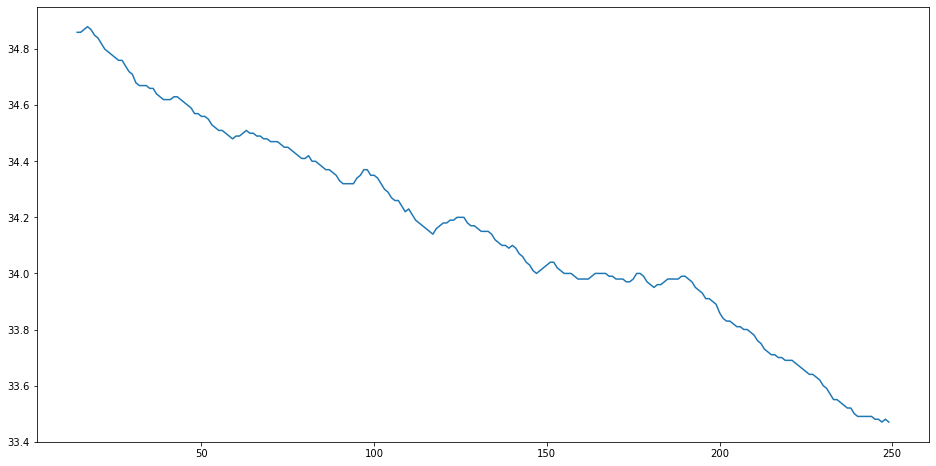

In [14]:
x_s = prcNormalized[76]
plt.figure(figsize=(16,8))
#plt.plot(y_s, prcNormalized[36])
plt.plot(y_s, prcNormalized[76].shift(14))


In [40]:
from sklearn import linear_model
model = linear_model.LinearRegression()
X = []
training = 100
stock = leaders[5]
y = prcNormalized[5]
start = 0
for leader in stock:
    start = max(start, stock[leader][1])
for i in range(start, training):
    cur = []
    for leader in stock:
        target = prcNormalized[leader].shift(stock[leader][1])[i]
        cur.append(target)
    X.append(cur)
model.fit(X, y[start:training])

    

LinearRegression()

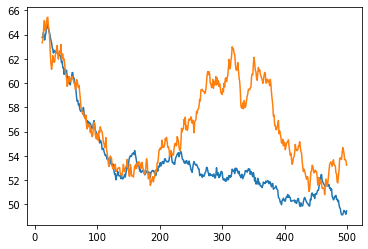

In [41]:
testing = []
for i in range(start, 500):
    cur = []
    for leader in stock:
        target = prcNormalized[leader].shift(stock[leader][1])[i]
        cur.append(target)
    testing.append(cur)
y_pred = model.predict(testing)
plt.plot(list(range(start, 500)), y_pred)
plt.plot(list(range(start, 500)), y[start:500])


In [47]:
from lm import *
y_pred = []
for i in range(50,500, 5):
    newPred = recalculateModel(prcNormalized[:i], 5)
    y_pred.append(newPred)
    

TypeError: object of type 'int' has no len()